In [1]:
"""                                                                                                 
Separate file to keep segmentation paramters in it. E.g,                                            
stopping_criterion = 0.47                                                                           
vessel_probability_threshold = .68                                                                  
dilation_size = 3                                                                                   
minimum_size = 4000
"""
from segmentation_param import *
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp

In [2]:
#segmentation entry point functions
from read_tiff_files import read_tiff_files
from classify_pixel import classify_pixel
from detect_cells import detect_cells
from segment_vessels import segment_vessels

In [3]:
# Following parameters to be passed in as parameters to this script. 
tiff_files_location = '/Users/mehditondravi/Downloads/eva_block'
classifier_file = '/Users/mehditondravi/playground/mat_to_python/ilastik_play/xbrain/library/ilastik_classifiers/ilastik_test_s4.ilp'


In [4]:
# Read tiff stack files - output of tomopy. 
input_data = read_tiff_files(tiff_files_location)

In [5]:
print("input_data shape", input_data.shape)

('input_data shape', (1012, 728, 280))


In [6]:
%matplotlib inline

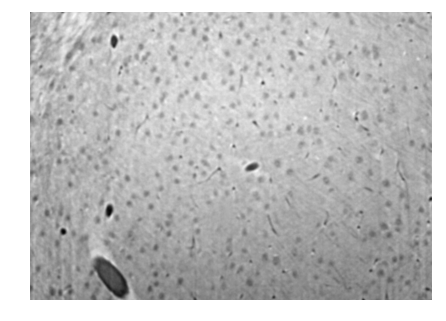

In [7]:
ndp.plot(input_data, slice=50)

In [8]:
# Compute cell and vessel probability map.
probability_maps = classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size) 

INFO ilastik_main: Starting ilastik from "/Applications/anaconda/envs/ilastik-devel2".
Starting ilastik from "/Applications/anaconda/envs/ilastik-devel2".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO ilastik.shell.projectManager: Opening Project: /Users/mehditondravi/playground/mat_to_python/ilastik_play/xbrain/library/ilastik_classifiers/ilastik_test_s4.ilp


WARNING dataset.py(76): DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
WARNING appletSerializer.py(792): UserWarning: This project file uses an old or unsupported classifier storage format. The classifier will be stored in the new format when you save your project.


input_data.shape (1012, 728, 280)
label_names, label_colors, probability_colors ['Label 1', 'Label 2', 'Label 3'] [(255, 0, 0), (0, 255, 0), (255, 255, 0)] [(255, 0, 0), (0, 255, 0), (112, 227, 255)]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 260.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (91, 91, 91, 3)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 373.7MiB
predictions.dtype, predictions.shape float32 (1012, 728, 280, 3)
DONE.


In [9]:
cell_prob_map = probability_maps[:, :, :, 2]

In [10]:
print("cell_prob_map shape", cell_prob_map.shape)

('cell_prob_map shape', (1012, 728, 280))


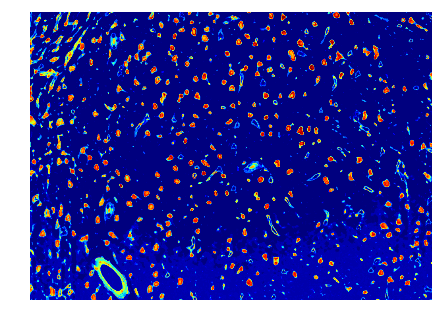

In [11]:
ndp.plot(cell_prob_map, slice=50, cmap1='jet')

In [12]:
vessel_prob_map = probability_maps[:, :, :, 1]

In [13]:
print("vessel_prob_map shape", vessel_prob_map.shape)

('vessel_prob_map shape', (1012, 728, 280))


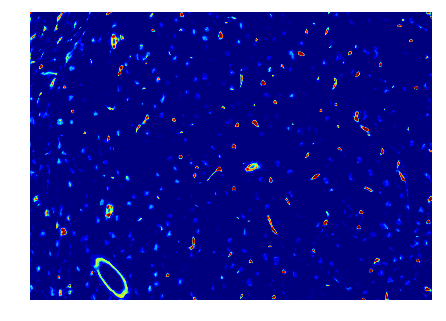

In [14]:
ndp.plot(vessel_prob_map, slice=50, cmap1='jet')

In [15]:
# Parallel operation to detect cells to be designed. Hard coded for now - cut 400x400x240 volume.
crop_probability_maps = probability_maps[100:500, 100:500, 20:260]

In [16]:
print("crop_probability_maps shape", crop_probability_maps.shape)

('crop_probability_maps shape', (400, 400, 240, 3))


In [17]:
crop_cell_prob__map = crop_probability_maps[:, :, :, 2]

In [18]:
print("crop_cell_prob__map shape", crop_cell_prob__map.shape)

('crop_cell_prob__map shape', (400, 400, 240))


In [19]:
crop_vessel_prob_map = crop_probability_maps[:, :, :, 1]

In [20]:
print("crop_vessel_prob_map", crop_vessel_prob_map.shape)

('crop_vessel_prob_map', (400, 400, 240))


In [21]:
crop_input_data = input_data[100:500, 100:500, 20:260]

In [23]:
print("crop_input_data shape", crop_input_data.shape)

('crop_input_data shape', (400, 400, 240))


In [24]:
centroids, cell_map = detect_cells(crop_cell_prob__map, cell_probability_threshold, stopping_criterion, initial_template_size, dilation_size, max_no_cells) 

WARNING compute3dvec.py(110): VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


Iteration remaining =  499 Correlation =  [[ 0.78509557]]
Iteration remaining =  449 Correlation =  [[ 0.66117436]]
Iteration remaining =  399 Correlation =  [[ 0.63832802]]
Iteration remaining =  349 Correlation =  [[ 0.61662418]]
Iteration remaining =  299 Correlation =  [[ 0.60109472]]
Iteration remaining =  249 Correlation =  [[ 0.58978504]]
Iteration remaining =  199 Correlation =  [[ 0.57731289]]
Iteration remaining =  149 Correlation =  [[ 0.56855494]]
Iteration remaining =  99 Correlation =  [[ 0.5571059]]
Iteration remaining =  49 Correlation =  [[ 0.54808521]]


In [26]:
print(centroids.shape)

(500, 4)


In [27]:
print(cell_map.shape)

(400, 400, 240)


In [28]:
vessel_map = segment_vessels(crop_vessel_prob_map, vessel_probability_threshold, dilation_size, minimum_size) 

In [29]:
print(vessel_map.shape)

(400, 400, 240)


Raw Image Slice


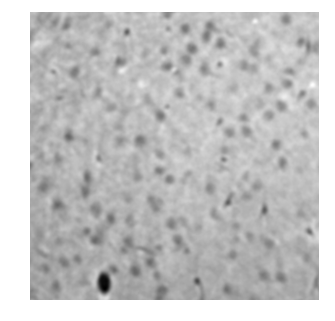

In [30]:
print("Raw Image Slice")
ndp.plot(crop_input_data, slice=50)

Cell Segmentation


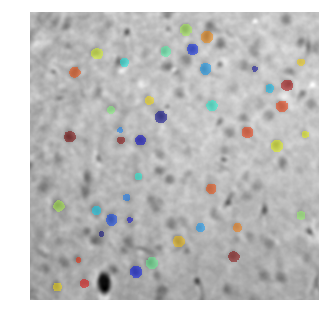

In [31]:
print("Cell Segmentation")
ndp.plot(crop_input_data, cell_map, slice = 50, alpha = 0.5)

Vessel Segmentation


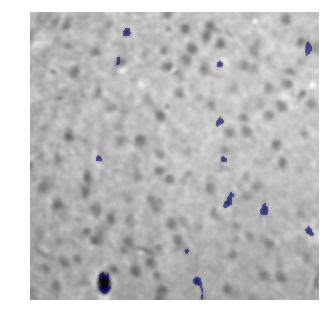

In [32]:
print("Vessel Segmentation")
ndp.plot(crop_input_data, vessel_map, slice = 50, alpha = 0.5)

Cell Probabilities


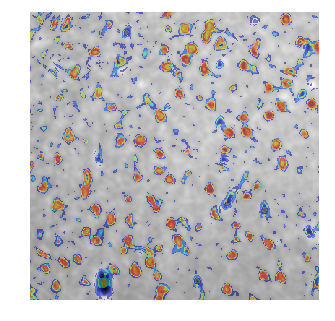

In [33]:
print("Cell Probabilities")
ndp.plot(crop_input_data, crop_cell_prob__map, slice = 50, alpha = 0.5)

Vessel Probabilities


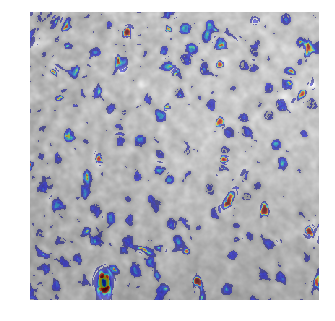

In [34]:
print("Vessel Probabilities")
ndp.plot(crop_input_data, crop_vessel_prob_map, slice = 50, alpha = 0.5)